# Escuela Politécnica Nacional

## Ingeniería en Sistemas informáticos y de computación
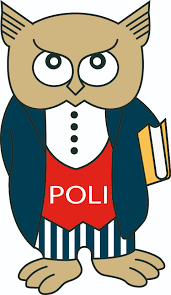
### Autor : Juan Diego Guevara Sanandrés
#### INFORME PANDAS

Pandas es una biblioteca de código abierto con licencia BSD que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para el lenguaje de programación **Python**. 

En el presente informe se presentará un ejemplo práctico de análisis de datos del juego Fifa 20.

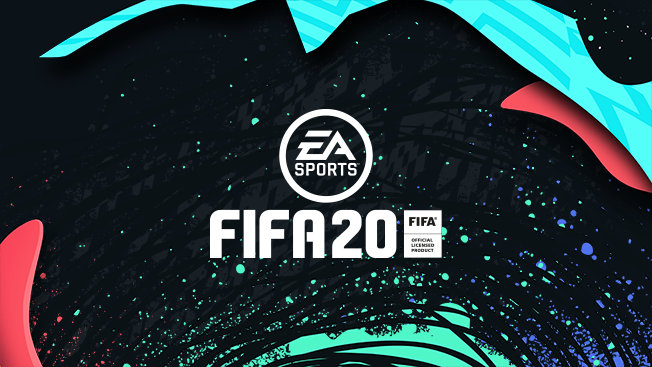

#### ESCENARIO DE PRUEBA
Dentro del juego existe una modalidad llamada **Modo Carrera**, en la cuál el jugador es el director técnico del equipo y maneja todos los aspectos del mismo como:
    
       -Fichajes
       -Venta de jugadores
       -Alineaciones 
       -Pártidos en tiempo real

Es necesario tener en cuenta que siempre que se juega esté modo el equipo que se escoge tiene un presupuesto y el problema principal es al momento de fichar jugadores y mejorar la plantilla. La mejor vía es fichar jugadores jóvenes con buena proyección y potencial para el futuro, pero, buscarlos resulta tedioso así que vamos a realizar un análisis para escoger los mejores fichajes que beneficien al equipo a crecer y ganar más títulos.

#### PRÁCTICA
1. DataSet a DataFrame 

Para el informe se uso el siguiente dataset: [link to DataSet!](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset). Aquí tenemos toda la información sobre los jugadores de Fifa20 para la resolución de nuestro ejercicio solo usaremos algunas columnas. Al descargarlo como .csv estaremos listos para convertir todos esos datos en un DataFrame y manejarlos a nuestra conveniencias gracias a Pandas. 

    1.1 Empezaremos por importar todas las librerías

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

    1.2 Creamos el path en donde se encuentra el dataset y las columnas que usaremos, luego procederemos a crear el DataFrame

In [4]:
#Dirección del Archivo
path = "X://Documents//7mo//Python//FifaDataSet//players_20.csv"
#Columnas que van ha estar dentro del DataFrame
columns = ['ID',
           'Name',
           'Age',
           'Nationality',
           'Club',
           'Position',
           'Overall',
           'Potential',
           'Preferred Foot',
           'Weak Foot',
           'Skill Moves',
           'Pace',
           'Shooting',
           'Passing',
           'Dribbling',
           'Defending',
           'Physic',
           'Contract Valid Until',
           'Value',
           'Wage']
#Creación del DataFrame con la columna de index = al ID de cada jugador
fifa_all_players = pd.read_csv(
        path,
        usecols = columns,
        index_col = 'ID')
print(fifa_all_players)

                     Name  Age Nationality                           Club  \
ID                                                                          
158023           L. Messi   32   Argentina                   FC Barcelona   
20801   Cristiano Ronaldo   34    Portugal                       Juventus   
190871          Neymar Jr   27      Brazil            Paris Saint-Germain   
200389           J. Oblak   26    Slovenia                Atlético Madrid   
183277          E. Hazard   28     Belgium                    Real Madrid   
...                   ...  ...         ...                            ...   
245006         Shao Shuai   22    China PR               Beijing Renhe FC   
250995       Xiao Mingjie   22    China PR               Shanghai SIPG FC   
252332          Zhang Wei   19    China PR         Hebei China Fortune FC   
251110       Wang Haijian   18    China PR  Shanghai Greenland Shenhua FC   
233449         Pan Ximing   26    China PR         Hebei China Fortune FC   

Se muestras los primeros y últimos 5 jugadores ya que son 18278 jugadores dentro del DataSet.

2. Selección de Jugadores menores de 20 años y demografía por País

    2.1 Creamos un nuevo dataframe con la condición de edad <= 20 (edad)

In [5]:
fifa_young_players = fifa_all_players.loc[fifa_all_players.Age <= 20]

    2.2 Se muestra los resultados comparados con el total de jugadores y los mayores de 20 años

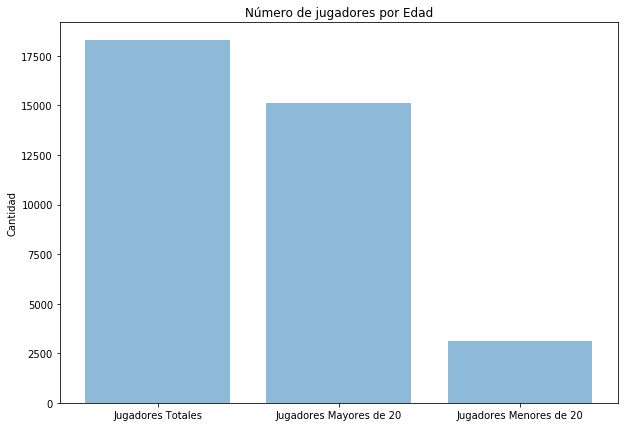

In [6]:
labels = ['Jugadores Totales','Jugadores Mayores de 20','Jugadores Menores de 20']
y_pos = np.arange(len(labels))
data = [len(fifa_all_players.index),len(fifa_all_players.index)-len(fifa_young_players.index),len(fifa_young_players.index)]
fig1, graph_gender_loan_amount = plt.subplots()
fig1.set_size_inches(10, 7)
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Cantidad')
plt.title('Número de jugadores por Edad')
plt.show()

    2.3 Con los datos obtenidos, descartaremos los jugadores jóvenes que tengan un potencial menor a 80 ya que no se consideran buenos jugadores para los fines del equipo.

In [7]:
fifa_young_best_potential_players = fifa_young_players.loc[fifa_young_players.Potential >= 80].sort_values(ascending=False,by='Potential')

    2.4 Los agruparemos por nacionalidad para ver que países tienen mayor cantidad de Canteranos en crecimiento.

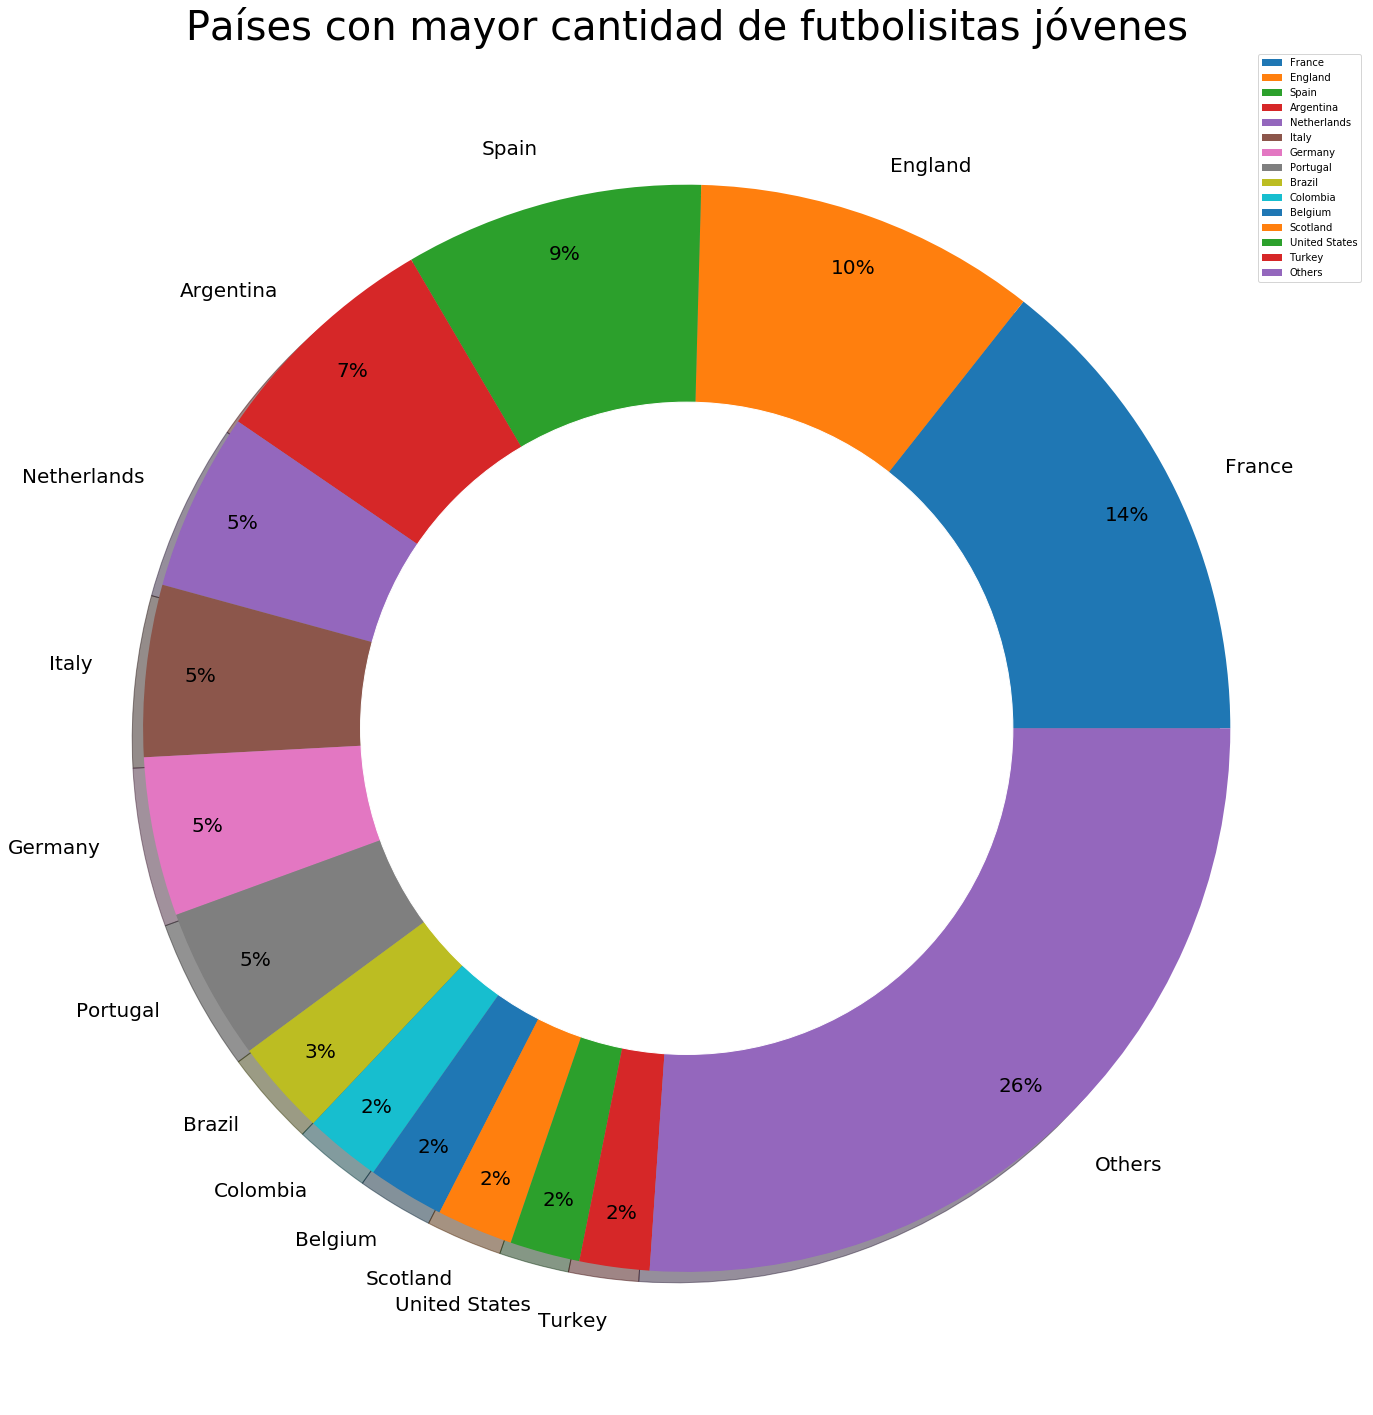

In [8]:
#Agrupación por País
fifa_young_players_by_country = fifa_young_best_potential_players.groupby('Nationality')['Name'].count().sort_values(ascending = False)

#Reducción de países con resultados menores a 10 jugadores 
amount_by_country_top = fifa_young_players_by_country[fifa_young_players_by_country>10]
amount_by_country_bottom = pd.Series(fifa_young_players_by_country[fifa_young_players_by_country <= 10].sum(), index=['Others'])
amount_by_country_final = amount_by_country_top.append(amount_by_country_bottom)

#Pie Chart
number_players_by_country = amount_by_country_final.array
graph_amount_players_by_country = amount_by_country_final.plot(pctdistance=0.9, autopct='%1.0f%%', legend=True, shadow=True, kind='pie', figsize = (30, 25), fontsize=20)
plt.title(label='Países con mayor cantidad de futbolisitas jóvenes', fontsize=40)
circle_donut=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle_donut)
plt.ylabel('')
plt.show()

Others representan países con menos de 10 jugadores menores a 20 años que no representan interés en este estudio. 

3. Análisis detallado de los 2 países con mayor número de jugadores jóvenes

Se usará a Francia e Inglaterra como punto de búsqueda de nuestros jugadores vale la pena recalcar que se puede hacer esto para cualquier país pero por el número de futbolistas se escogió los 2 ya mencionados.

    3.1 Francia
    
    Francia posee 14% de los futbolistas jóvenes en todo el mundo. Primero vamos analizar el potencial en los diferentes sectores de la cancha: Delantera, Mediocampo, Defensa.
    
    Es necesario separar el grupo total de jugadores por sectores y para ello se usa la posición del jugador.

In [10]:
france_players = pd.read_pickle("X://Documents//7mo//Python//FifaDataSet//players_France.pickle")

france_forward_players = france_players.query('Position == \'ST\' | Position == \'RW\' | Position == \'LW\' | Position == \'CF\' ')
france_mid_players = france_players.query('Position == \'CAM\' | Position == \'CM\' | Position == \'CDM\' | Position == \'RM\' | Position == \'LM\'')
france_defense_players = france_players.query('Position == \'GK\' | Position == \'LB\' | Position == \'RB\' | Position == \'CB\' ')

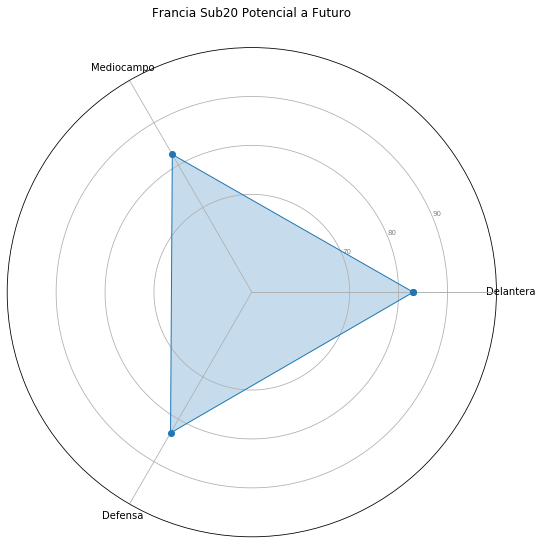

In [13]:
def average_Ability(team_players):
    return (np.average(team_players.Potential))

labels = np.array(['Delantera','Mediocampo','Defensa'])
stats = np.array([average_Ability(france_forward_players),average_Ability(france_mid_players),average_Ability(france_defense_players)])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, polar=True)
plt.yticks([70,80,90], ["70","80","90"], color="grey", size=7)
plt.ylim(50,100)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Francia Sub20 Potencial a Futuro')
ax.grid(True)

En la imagen se muestra la valoración de los jugadores en cada sector de la cancha. Como se puede ver en Francia tiene una cantera equilibrada en todos los aspectos. **Vale la pena recalcar que esto es una estimación del potencial de los jugadores**, esto quiere decir que depende de la evolución del jugador para que de el salto a convertirse en una estrella. 

Para mejorar el análisis vamos hacer una revisión actual del rendimiento de los jugadores, revisando aspectos más específicos.

In [14]:
def average_Stats(team_players,stat):
    return (np.average(team_players[stat]))

france_players_no_GK = france_players.query('Position != \'GK\'')

labels = np.array(['Pace','Shooting','Passing','Dribbling','Defending','Physic'])
stats = np.array([average_Stats(france_players_no_GK,'Pace'),
                  average_Stats(france_players_no_GK,'Shooting'),
                  average_Stats(france_players_no_GK,'Passing'),
                  average_Stats(france_players_no_GK,'Dribbling'),
                  average_Stats(france_players_no_GK,'Defending'),
                  average_Stats(france_players_no_GK,'Physic')])

Para este análisis usaremos a todos los jugadores excepto los porteros que tienen valoraciones diferentes dentro del juego. Se evaluará: Velocidad, Tiro, Pase, Drible, Defensa, Físico.

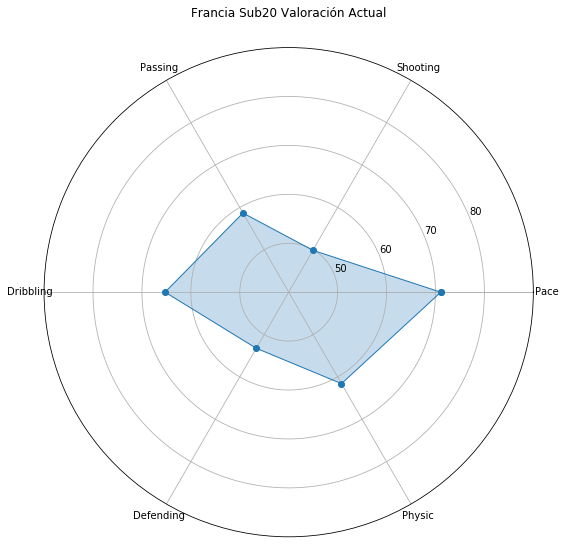

In [15]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, polar=True)
plt.yticks([50,60,70,80], ["50","60","70","80"], color="black", size=10)
plt.ylim(40,90)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Francia Sub20 Valoración Actual')
ax.grid(True)

Se puede ver que la Velocidad, Drible y Físico son los más altos. Esto nos indica que Francia tiene jugadores especializados por las bandas. De esta manera nuestro objetivo será contratar un extremo, volante o lateral. Para ello analizaremos los mejores jugadores jóvenes con esas carácteristicas y su valor en el mercado.

C:\Users\jdjuxx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


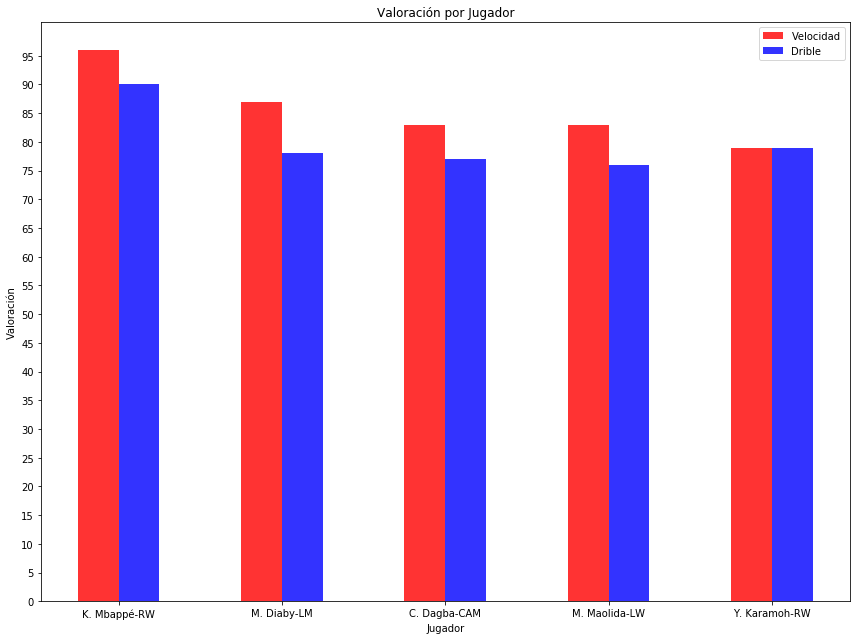

In [19]:
france_players_no_GK['Total'] = (france_players_no_GK['Pace'] + france_players_no_GK ['Dribbling'] )/2
france_best_players = france_players_no_GK.sort_values(ascending = False,by='Total').head(5)

fig, ax = plt.subplots(figsize=(12,9))
index = np.arange(len(france_best_players.index))
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, france_best_players['Pace'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Velocidad')

rects2 = plt.bar(index + bar_width, france_best_players['Dribbling'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Drible')

plt.xlabel('Jugador')
plt.ylabel('Valoración')
plt.title('Valoración por Jugador')
plt.yticks(np.arange(0, 100, 5))
plt.xticks(index + bar_width/2, france_best_players['Name']+'-'+france_best_players['Position'])
plt.legend()
plt.tight_layout()
plt.show()

Se obtienen los mejores jugadores con su respectiva posición en el campo de juego. Lo que se evaluó para escogerlos fue la velocidad y el drible. Sin embargo, es necesario ver su precio en el mercado y el sueldo para decidir cuál conviene mejor al equipo, tomando en cuenta el presupuesto del mismo.

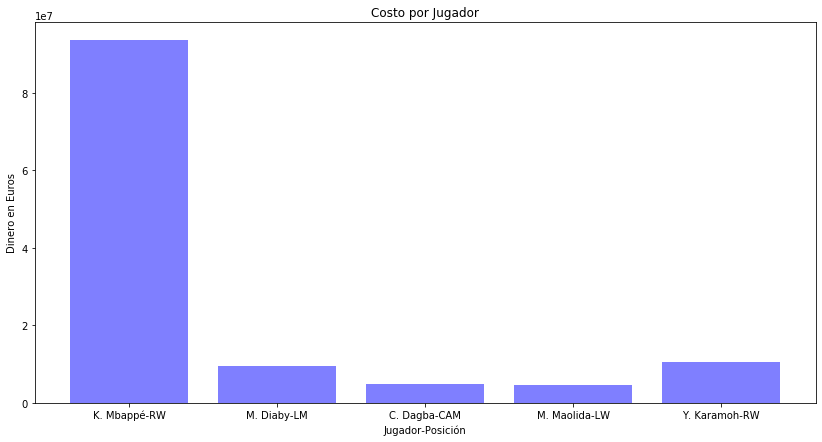

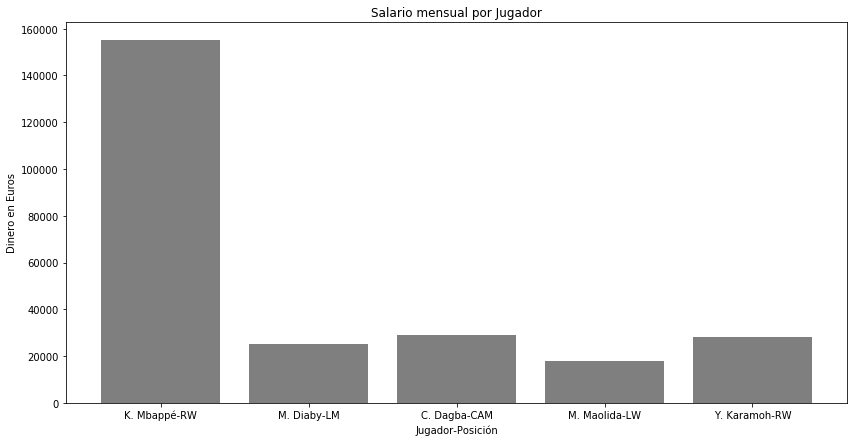

In [29]:
fig1, graph = plt.subplots()
fig1.set_size_inches(14, 7)
plt.bar(index, france_best_players['Value'], align='center', alpha=0.5, color="blue")
plt.xticks(index, france_best_players['Name']+'-'+france_best_players['Position'])
plt.ylabel('Dinero en Euros')
plt.xlabel('Jugador-Posición')
plt.title('Costo por Jugador')
plt.show()

fig1, graph= plt.subplots()
fig1.set_size_inches(14, 7)
plt.bar(index, france_best_players['Wage'], align='center', alpha=0.5, color="black")
plt.xticks(index, france_best_players['Name']+'-'+france_best_players['Position'])
plt.ylabel('Dinero en Euros')
plt.xlabel('Jugador-Posición')
plt.title('Salario mensual por Jugador')
plt.show()

De esta manera ya podemos decidir que jugador comprar según el presupuesto del Equipo. Para un equipo grande Kilian Mbappé es la mejor elección. Pero para un equipo no tan bien posicionado económicamente la mejor opción sería M.Diaby ya que tiene un precio bajo en salario y a pesar de ser más caro que los demás en el mercado, sus estadísticas son un poco superiores.

    3.2 Inglaterra
    
    Inglaterra se acerca a francia en jugadores jóvenes con un 10% del total. Nuestro objetivo será buscar un jugador en diferente posición del que ya habíamos contratado suponiendo que M.Diaby (Francia)aceptara la oferta.  
    
    Empecemos analizando el potencial de los ingleses.

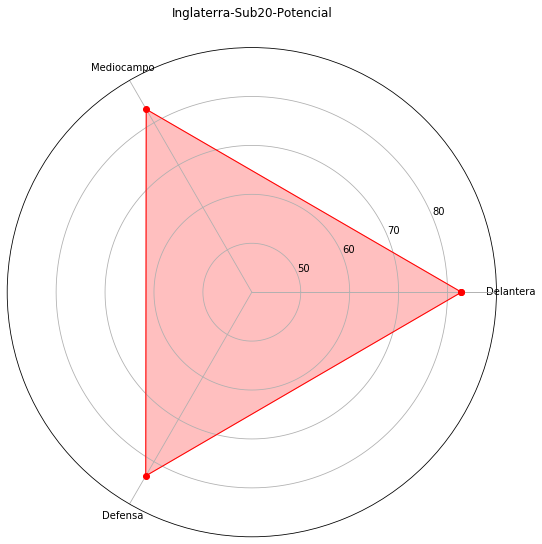

In [24]:
england_players = pd.read_pickle("X://Documents//7mo//Python//FifaDataSet//players_England.pickle")

england_forward_players = england_players.query('Position == \'ST\' | Position == \'RW\' | Position == \'LW\' | Position == \'CF\' ')
england_mid_players = england_players.query('Position == \'CAM\' | Position == \'CM\' | Position == \'CDM\' | Position == \'RM\' | Position == \'LM\'')
england_defense_players = england_players.query('Position == \'GK\' | Position == \'LB\' | Position == \'RB\' | Position == \'CB\' ')

labels = np.array(['Delantera','Mediocampo','Defensa'])
stats = np.array([average_Ability(england_forward_players),average_Ability(england_mid_players),average_Ability(england_defense_players)])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))
fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, polar=True)
plt.yticks([50,60,70,80], ["50","60","70","80"], color="black", size=10)
plt.ylim(40,90)
ax.plot(angles, stats, 'o-', linewidth=1, color="red")
ax.fill(angles, stats, alpha=0.25, color="red")
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Inglaterra-Sub20-Potencial')
ax.grid(True)

Vemos una proyección en todos los sentidos, aún así es necesario contar con el análisis detallado.

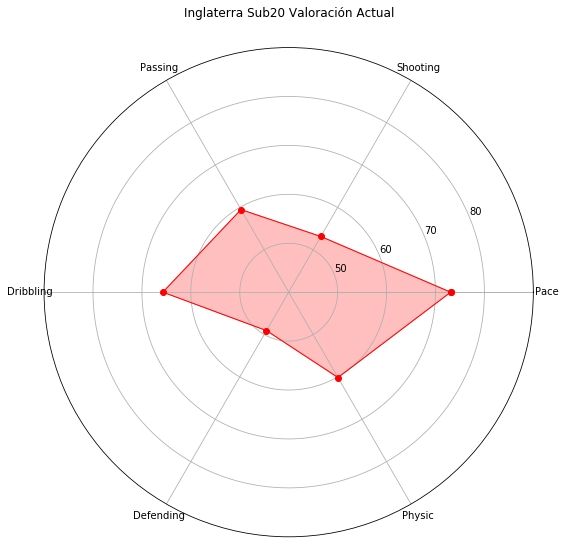

In [26]:
england_players_no_GK = england_players.query('Position != \'GK\'')

labels = np.array(['Pace','Shooting','Passing','Dribbling','Defending','Physic'])
stats = np.array([average_Stats(england_players_no_GK,'Pace'),
                  average_Stats(england_players_no_GK,'Shooting'),
                  average_Stats(england_players_no_GK,'Passing'),
                  average_Stats(england_players_no_GK,'Dribbling'),
                  average_Stats(england_players_no_GK,'Defending'),
                  average_Stats(england_players_no_GK,'Physic')])

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, polar=True)
plt.yticks([50,60,70,80], ["50","60","70","80"], color="black", size=10)
plt.ylim(40,90)
ax.plot(angles, stats, 'o-', linewidth=1, color="red")
ax.fill(angles, stats, alpha=0.25, color="red")
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Inglaterra Sub20 Valoración Actual')
ax.grid(True)

En inglaterra también tenemos jugadores rápidos y con buen drible. Como ya escogimos un jugador con esas carácteristicas anteriormente esta vez nos centraremos en analizar: Pase, Drible y Tiro.

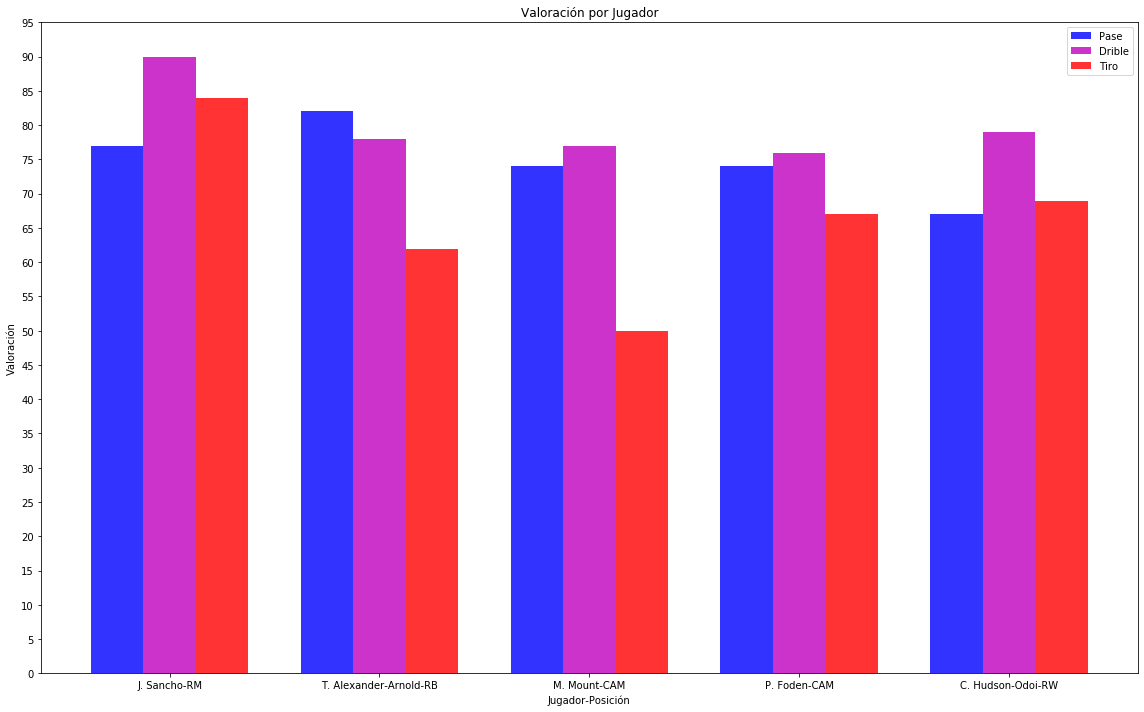

In [27]:
england_players_no_GK['Total'] = (england_players_no_GK['Passing'] + england_players_no_GK ['Dribbling']+ england_players_no_GK['Shooting'])/3
england_best_players = england_players_no_GK.sort_values(ascending = False,by='Total').head(5)


fig, ax = plt.subplots(figsize=(16,10))
index = np.arange(len(england_best_players.index))
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, england_best_players['Passing'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Pase')

rects2 = plt.bar(index + bar_width, france_best_players['Dribbling'], bar_width,
                 alpha=opacity,
                 color='m',
                 label='Drible')

rects3 = plt.bar(index + bar_width*2, france_best_players['Shooting'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Tiro')

plt.xlabel('Jugador-Posición')
plt.ylabel('Valoración')
plt.title('Valoración por Jugador')
plt.yticks(np.arange(0, 100, 5))
plt.xticks(index + bar_width, england_best_players['Name']+'-'+england_best_players['Position'])
plt.legend()
plt.tight_layout()
plt.show()

Continuamos analizando el precio y su salario. Las opcionados serían Mason Mount y Phil Foden, ambos son centrocampistas ofensivos (CAM), ya que los demás juegan por las bandas y ya habíamos contratado un jugador así.

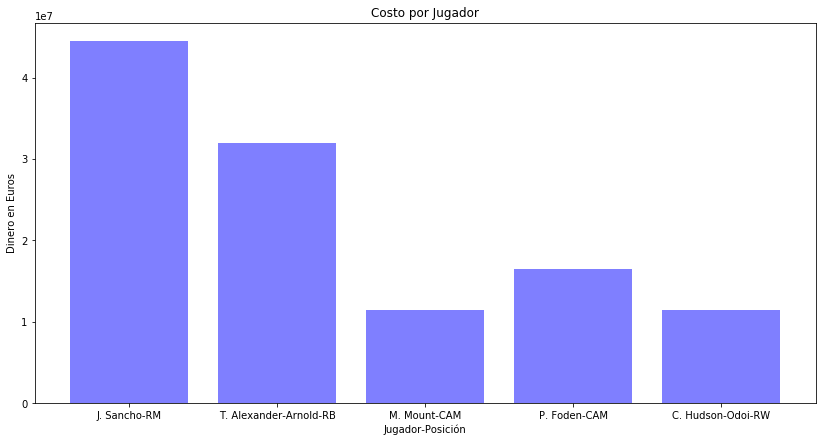

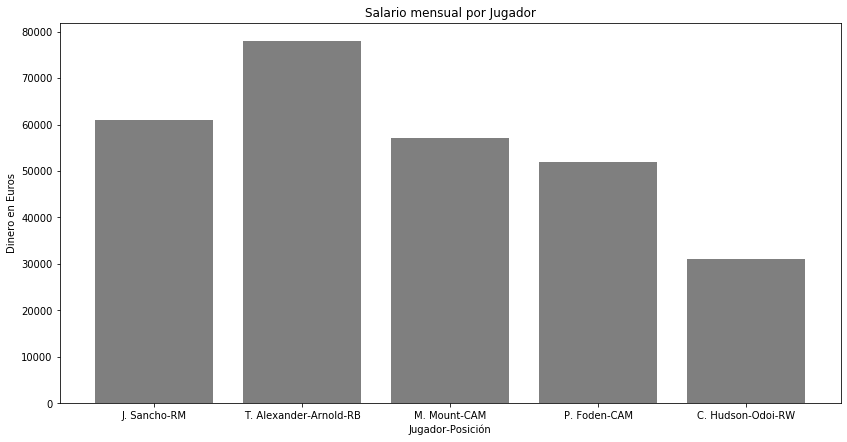

In [30]:
fig1, graph = plt.subplots()
fig1.set_size_inches(14, 7)
plt.bar(index, england_best_players['Value'], align='center', alpha=0.5, color="blue")
plt.xticks(index, england_best_players['Name']+'-'+england_best_players['Position'])
plt.ylabel('Dinero en Euros')
plt.xlabel('Jugador-Posición')
plt.title('Costo por Jugador')
plt.show()

fig1, graph= plt.subplots()
fig1.set_size_inches(14, 7)
plt.bar(index, england_best_players['Wage'], align='center', alpha=0.5, color="black")
plt.xticks(index, england_best_players['Name']+'-'+england_best_players['Position'])
plt.ylabel('Dinero en Euros')
plt.xlabel('Jugador-Posición')
plt.title('Salario mensual por Jugador')
plt.show()

En base a la información recolectada, Phil Foden parece ser la mejor opción. Es cierto que su precio en el mercado es mayor al de Mason Mount pero sus estadísticas son mejores en cuestiones de tiro además que su salario es un poco menor.

4. Analizando rivales

Ya tenemos 2 contrataciones de lujo, jóvenes promesas que aportarán de la mejor manera al equipo. Sin embargo, tener buenos jugadores no es lo único que  asegura una victoria. Estudiar al rival es algo vital antes de cada partido, poner la formación correcta y las instrucciones adecuadas pueden hacer que a pesar de no tener un plantilla de lujo, se pueda conseguir una victoria frente a un grande.

    4.1 Analizando al Barcelona de España
    
    Supongamos que nos enfrentamos al Barcelona de España por la final de la Champions League, es el partido más importante y difícil de todo el juego así que te tienes que preparar bien.

In [31]:
barcelona_players = pd.read_pickle("X://Documents//7mo//Python//FifaDataSet//players_barca.pickle")

barcelona_first_team = barcelona_players.loc[barcelona_players.Overall >= 76]

barcelona_first_team_no_GK = barcelona_first_team.query('Position != \'GK\'')

labels = np.array(['Pace','Shooting','Passing','Dribbling','Defending','Physic'])
stats = np.array([average_Stats(barcelona_first_team_no_GK,'Pace'),
                  average_Stats(barcelona_first_team_no_GK,'Shooting'),
                  average_Stats(barcelona_first_team_no_GK,'Passing'),
                  average_Stats(barcelona_first_team_no_GK,'Dribbling'),
                  average_Stats(barcelona_first_team_no_GK,'Defending'),
                  average_Stats(barcelona_first_team_no_GK,'Physic')])
    

Obtenemos todas las estadísticas generales de todos los jugadores con excepción del portero. Con esto tendremos los puntos más fuertes y débiles del equipo.

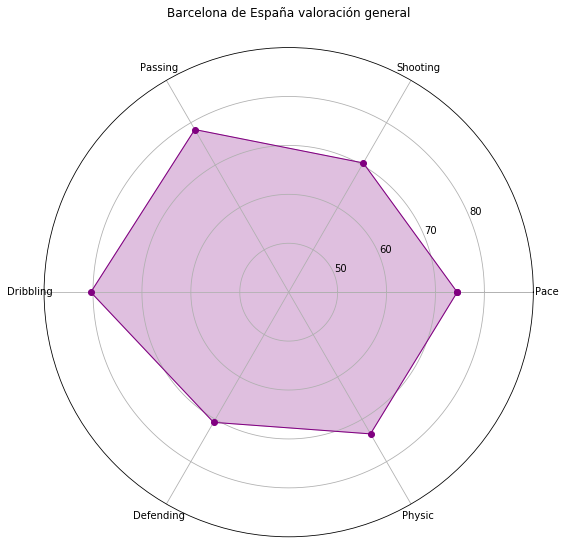

In [32]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure(figsize=(9,9))
ax  = fig.add_subplot(111, polar=True)
plt.yticks([50,60,70,80], ["50","60","70","80"], color="black", size=10)
plt.ylim(40,90)
ax.plot(angles, stats, 'o-', linewidth=1, color="purple")
ax.fill(angles, stats, alpha=0.25, color="purple")
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Barcelona de España valoración general')
ax.grid(True)

Con la gráfica se puede deducir que la fortaleza del equipo se encuentra en el pase y el drible. Mantener la posesión del balón y buscar pases filtrados con Messi como lider, no es sorpresa que el Barcelona tenga estás cualidades y los datos no mienten. 

Lo importante es centrarse en las debilidades. La velocidad no es la mejor para el equipo, al igual que la defensa, es ahí donde vamos a centrarnos. Existen 2 estrategias:
1. Presión alta:
Se necesita de un equipo físicamente bueno para realizarlo ya que los jugadores deberan subir y bajar presionando arriba y en caso de una salida rápida del rival volviendo a cubrir el puesto lo más rápido posible.
2. Contrataque:
Está requiere de un equipo rápido y con una defensa superior. Mientras el equipo rival realiza su juego de posesión, se intenta cortar las líneas de pase lo máximo posible, apenas se recupere el balón se realiza una salida rápida por las bandas.

De esta manera es posible que ganes la final. Vale la pena recalcar que estos datos no son exactos y varían dependiendo de como vaya avanzando el juego. Sin embargo, es una guía precisa que se puede aplicar en más países, jugadores o equipos. 